In [183]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

## Punto 1

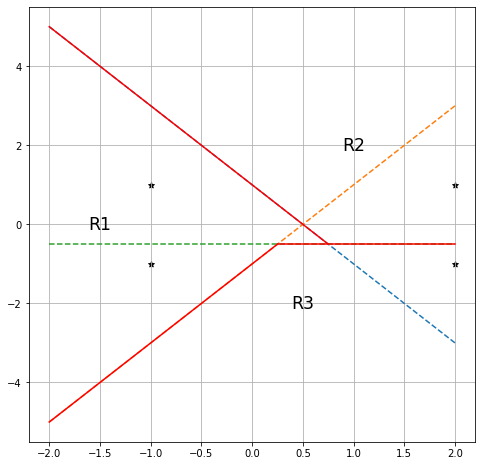

In [184]:
x = np.linspace(-2,2,100)
g1_2 = lambda u: 1-2*u
g1_3 = lambda u: 2*u-1
g2_3 = lambda u: [-1/2]*len(u)

pts = np.array([[2,1],[2,-1],[-1,1],[-1,-1]])

x_lim1 = np.linspace(-2,3/4,100)
x_lim2 = np.linspace(-2,1/4,100)
x_lim3 = np.linspace(1/4,2,100)

fig,ax = pl.subplots(figsize=[8,8])
ax.grid()
ax.scatter(pts.T[0],pts.T[1],marker='*',color='k')

ax.plot(x,g1_2(x),ls='--')
ax.plot(x,g1_3(x),ls='--')
ax.plot(x,g2_3(x),ls='--')

ax.plot(x_lim1,g1_2(x_lim1),color='r')
ax.plot(x_lim2,g1_3(x_lim2),color='r')
ax.plot(x_lim3,g2_3(x_lim3),color='r')


pl.text(-1.5,0, 'R1', fontsize="xx-large", horizontalalignment='center', verticalalignment='center')
pl.text(1,2, 'R2', fontsize="xx-large", horizontalalignment='center', verticalalignment='center')
pl.text(0.5,-2, 'R3', fontsize="xx-large", horizontalalignment='center', verticalalignment='center');

In [185]:
g1 = lambda x,y : -x
g2 = lambda x,y : x + y -1
g3 = lambda x,y : x-y-1

In [186]:
def clasificador(f1,f2,f3,x):
    
    aux=np.array([f1(x[0],x[1]), f2(x[0],x[1]) , f3(x[0],x[1])], dtype='object')
    i = np.where((aux.max() == aux)&(aux>=0))[0]+1
    
    if len(i)!=0:
        return i[0]
    else:
        return 0


In [187]:
clasificador(g1,g2,g3,pts[1])

3

In [188]:
s = map(lambda x: clasificador(g1,g2,g3,x), pts)
list(s)

[2, 3, 1, 1]

## Punto 2

In [189]:
def clasificador2(f1,f2,x):
    
    aux=np.array([f1(x[0],x[1]), f2(x[0],x[1])], dtype='object')
    i = np.where((aux.max() == aux))[0]+1
    
    if len(i)!=0:
        return i[0]
    else:
        return 0

In [190]:

# Funciones discriminantes

g_a = lambda x1,x2: 3*x1 -5.193
g_b = lambda x1,x2: 3*x2 -5.193

# Frontera de decisión
frontera_decision = lambda u : u




In [191]:
pts_clasificados = {0:[],1:[],2:[]}

pts_A = np.random.randn(300,2)@[[1,0],[0,1]]+[3,0]
pts_B = np.random.randn(300,2)@[[1,0],[0,1]]+[0,3]
pts = np.concatenate((pts_A,pts_B),axis=0)

clas = np.array(list(map(lambda x: clasificador2(g_a,g_b,x), pts)))


pts_clasificados[0] = np.copy(pts[np.where(clas==0)[0]])
pts_clasificados[1] = np.copy(pts[np.where(clas==1)[0]])
pts_clasificados[2] = np.copy(pts[np.where(clas==2)[0]])


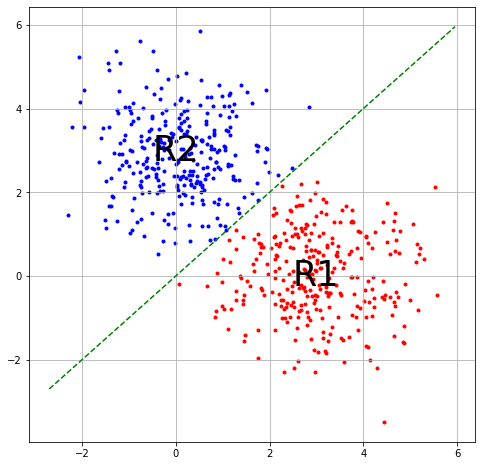

In [192]:

fig,ax = pl.subplots(figsize=[8,8])
ax.grid()

ax.scatter(pts_clasificados[0].T[0],pts_clasificados[0].T[1],marker='.',color='k')
ax.scatter(pts_clasificados[1].T[0],pts_clasificados[1].T[1],marker='.',color='r')
ax.scatter(pts_clasificados[2].T[0],pts_clasificados[2].T[1],marker='.',color='b')


n = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)

ax.plot(n,frontera_decision(n),color='g',ls='--');

ax.text(3,0, 'R1',  fontsize=35, horizontalalignment='center', verticalalignment='center')
ax.text(0,3, 'R2',  fontsize=35, horizontalalignment='center', verticalalignment='center');

## Punto 3

In [193]:
data = np.loadtxt("minicorpus.txt")
data = pd.DataFrame(data)
data_clasif=data.groupby(2)


dic_data = {int(clase):grupo.loc[:,0:1].reset_index(drop=True) for clase, grupo in data.groupby(2)}

In [194]:
medias = [(dic_data[key].sum())/len(dic_data[key]) for key in dic_data]
epsilon = [np.sum([np.array([[(dic_data[key].T[i].to_numpy()-medias[key-1])[0]],[(dic_data[key].T[i].to_numpy()-medias[key-1])[1]]])@np.array([[(dic_data[key].T[i].to_numpy()-medias[key-1])[0]],[(dic_data[key].T[i].to_numpy()-medias[key-1])[1]]]).T/len(dic_data[key]) for i in range(len(dic_data[key]))],axis=0) for key in dic_data]

In [195]:
#prob_clase = [1/4]*len(data_clasif)
prob_clase = (data[2].value_counts()/len(data)).to_numpy()

epsilon_i = np.linalg.inv(epsilon)

Wi = -0.5 * epsilon_i

wi = np.array([epsilon_i[i] @ medias[i] for i in range(len(medias))])

wi0 = [-0.5 * (medias[i].dot(epsilon_i[i]).dot(medias[i]) + np.log(np.linalg.det(epsilon_i[i]))) + np.log(prob_clase[i]) for i in range(len(medias))]


In [196]:
print(prob_clase)

[0.33333333 0.26086957 0.2173913  0.1884058 ]


In [197]:
G = lambda x: np.array([np.reshape(x.T[i].T@Wi@x.T[i],np.shape(wi0)) + np.reshape(wi@x.T[i],np.shape(wi0)) + wi0 for i in range(len(x.T))])

In [198]:
def clasificador4(H, x):
    
    return [int (np.where(H(x).max(axis=1)[i]==H(x)[i] )[0])+1  for i in range(len(H(x)))]
    

In [199]:
info = data[[0,1]].to_numpy().T

pts_clases = clasificador4(G,info)

p = pd.DataFrame(info.T)
p['Clase'] = pts_clases


In [200]:
p.T[4][0]

0.188127

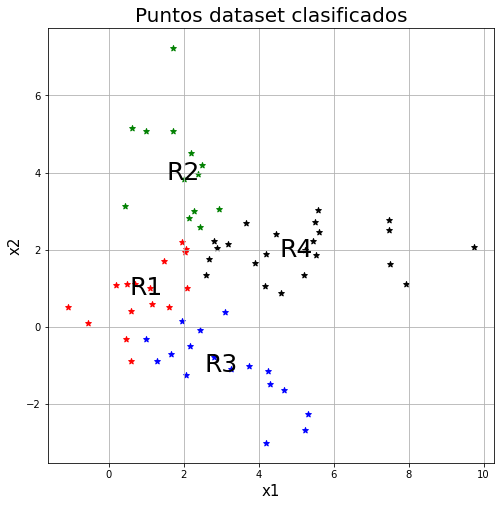

In [201]:

fig,ax = pl.subplots(figsize=[8,8])
ax.grid()

colores = ['r','g','b','k']



for i in range(len(p['Clase'].value_counts())):
    ax.scatter(p[p['Clase'] == i+1][0],p[p['Clase'] == i+1][1], marker='*', c=colores[i])
    ax.text(medias[i][0],medias[i][1], 'R{}'.format(i+1),  fontsize=25, horizontalalignment='center', verticalalignment='center')
    

ax.set_title('Puntos dataset clasificados',fontsize=20)

ax.set_xlabel('x1',fontsize=15)
ax.set_ylabel('x2',fontsize=15);


In [202]:
print("La tasa de acierto en el clasificador implementado fue de: {} %".format((data[2]==p['Clase']).value_counts(normalize=True)[True]*100))

La tasa de acierto en el clasificador implementado fue de: 88.40579710144928 %


####  Punto B

In [203]:
n=75


clase1 = pd.DataFrame([np.random.multivariate_normal(medias[0],epsilon[0]) for i in range(n)])
clase1[2]=1

clase2 = pd.DataFrame([np.random.multivariate_normal(medias[1],epsilon[1])for i in range(n)])
clase2[2]=2

clase3 = pd.DataFrame([np.random.multivariate_normal(medias[2],epsilon[2])for i in range(n)])
clase3[2]=3

clase4 = pd.DataFrame([np.random.multivariate_normal(medias[3],epsilon[3])for i in range(n)])
clase4[2]=4

In [204]:
clase_generada = clase1
clase_generada = clase_generada.append(clase2,ignore_index=True)
clase_generada = clase_generada.append(clase3,ignore_index=True)
clase_generada = clase_generada.append(clase4,ignore_index=True)


In [205]:
# Ahora clasifico

info_generada = clase_generada[[0,1]].to_numpy().T

pts_clases_generadas = clasificador4(G,info_generada)

p_generada = pd.DataFrame(info_generada.T)
p_generada['Clase'] = pts_clases_generadas

In [206]:
print("La tasa de acierto en el clasificador implementado fue de: {} %".format((clase_generada[2]==p_generada['Clase']).value_counts(normalize=True)[True]*100))

La tasa de acierto en el clasificador implementado fue de: 88.0 %


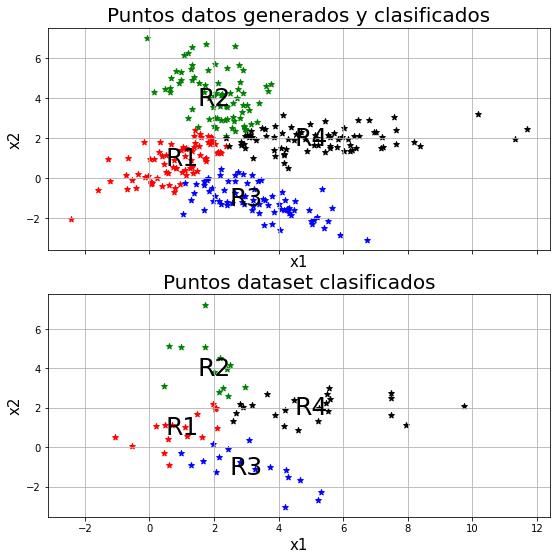

In [208]:
fig,ax = pl.subplots(2,1,figsize=[9,9],sharex=True)

ax[0].grid()
ax[1].grid()

colores = ['r','g','b','k']



for i in range(len(p_generada['Clase'].value_counts())):
    ax[0].scatter(p_generada[p_generada['Clase'] == i+1][0],p_generada[p_generada['Clase'] == i+1][1], marker='*', c=colores[i])
    ax[0].text(medias[i][0],medias[i][1], 'R{}'.format(i+1),  fontsize=25, horizontalalignment='center', verticalalignment='center')

for i in range(len(p['Clase'].value_counts())):
    ax[1].scatter(p[p['Clase'] == i+1][0],p[p['Clase'] == i+1][1], marker='*', c=colores[i])
    ax[1].text(medias[i][0],medias[i][1], 'R{}'.format(i+1),  fontsize=25, horizontalalignment='center', verticalalignment='center')


ax[0].set_title('Puntos datos generados y clasificados',fontsize=20)
ax[0].set_xlabel('x1',fontsize=15)
ax[0].set_ylabel('x2',fontsize=15);

ax[1].set_title('Puntos dataset clasificados',fontsize=20)
ax[1].set_xlabel('x1',fontsize=15)
ax[1].set_ylabel('x2',fontsize=15);